# Load CSV data
https://www.tensorflow.org/tutorials/load_data/csv

In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

2.3.0


In [2]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv", header=None, 
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [4]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 953us/step - loss: 62.8422
Epoch 2/10
104/104 [==============================] - 0s 934us/step - loss: 11.5633
Epoch 3/10
104/104 [==============================] - 0s 953us/step - loss: 8.5166
Epoch 4/10
104/104 [==============================] - 0s 943us/step - loss: 7.9946
Epoch 5/10
104/104 [==============================] - 0s 943us/step - loss: 7.5338
Epoch 6/10
104/104 [==============================] - 0s 953us/step - loss: 7.1693
Epoch 7/10
104/104 [==============================] - 0s 943us/step - loss: 6.8900
Epoch 8/10
104/104 [==============================] - 0s 972us/step - loss: 6.6946
Epoch 9/10
104/104 [==============================] - 0s 943us/step - loss: 6.5701
Epoch 10/10
104/104 [==============================] - 0s 943us/step - loss: 6.4563


In [5]:
# preprodessing
normalize = preprocessing.Normalization()
normalize.adapt(abalone_features)

norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 953us/step - loss: 92.2074
Epoch 2/10
104/104 [==============================] - 0s 943us/step - loss: 52.4665
Epoch 3/10
104/104 [==============================] - 0s 991us/step - loss: 15.6002
Epoch 4/10
104/104 [==============================] - 0s 982us/step - loss: 5.7161
Epoch 5/10
104/104 [==============================] - 0s 972us/step - loss: 5.0669
Epoch 6/10
104/104 [==============================] - 0s 972us/step - loss: 5.0343
Epoch 7/10
104/104 [==============================] - 0s 982us/step - loss: 4.9940
Epoch 8/10
104/104 [==============================] - 0s 982us/step - loss: 4.9883
Epoch 9/10
104/104 [==============================] - 0s 972us/step - loss: 4.9615
Epoch 10/10
104/104 [==============================] - 0s 991us/step - loss: 4.9235


In [6]:
# titanic
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [7]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [8]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Do a calculation using is
result = 2*input + 1

# the result doesn't have a value
result

<tf.Tensor 'AddV2:0' shape=(None,) dtype=float32>

In [9]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [10]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [11]:
inputs = {}

for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <tf.Tensor 'sex:0' shape=(None, 1) dtype=string>,
 'age': <tf.Tensor 'age:0' shape=(None, 1) dtype=float32>,
 'n_siblings_spouses': <tf.Tensor 'n_siblings_spouses:0' shape=(None, 1) dtype=float32>,
 'parch': <tf.Tensor 'parch:0' shape=(None, 1) dtype=float32>,
 'fare': <tf.Tensor 'fare:0' shape=(None, 1) dtype=float32>,
 'class': <tf.Tensor 'class:0' shape=(None, 1) dtype=string>,
 'deck': <tf.Tensor 'deck:0' shape=(None, 1) dtype=string>,
 'embark_town': <tf.Tensor 'embark_town:0' shape=(None, 1) dtype=string>,
 'alone': <tf.Tensor 'alone:0' shape=(None, 1) dtype=string>}

In [12]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<tf.Tensor 'normalization_1/truediv:0' shape=(None, 4) dtype=float32>

In [13]:
preprocessed_inputs = [all_numeric_inputs]

In [14]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue

    lookup = preprocessing.StringLookup(vocabulary=np.unique(titanic_features[name]))
    one_hot = preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

In [21]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

# tf.keras.utils.plot_model(model = titanic_preprocessing ,
#                           to_file='model.png',
#                           rankdir="LR", 
#                           dpi=96, 
#                           show_shapes=True)


In [22]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ]], dtype=float32)>

In [24]:
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
                            layers.Dense(64),
                            layers.Dense(1)
                            ])

    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)

    model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.optimizers.Adam())
    return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

Epoch 1/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5682
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4929
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4635
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4464
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4357
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4298
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4258
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4231
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4219
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4208
INFO:tensorflow:Assets written to: test\assets


In [25]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-2.029]], shape=(1, 1), dtype=float32)
tf.Tensor([[-2.029]], shape=(1, 1), dtype=float32)


In [26]:
# using tf.data
# On in memory data
import itertools

def slices(features):
    for i in itertools.count():
        # For each feature take index `i`
        example = {name:values[i] for name, values in features.items()}
        yield example
        
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [29]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

for example in features_ds:
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [30]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 0s 3ms/step - loss: 0.4207
Epoch 2/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4214
Epoch 3/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4196
Epoch 4/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4196
Epoch 5/5
20/20 [==============================] - 0s 3ms/step - loss: 0.4197


In [31]:
# From a single file
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

32768/30874 [===============================] - 0s 1us/step


In [32]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

for batch, label in titanic_csv_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
    print()
    print(f"{'label':20s}: {label}")

sex                 : [b'male' b'male' b'male' b'male' b'male']
age                 : [57. 37. 29. 28. 28.]
n_siblings_spouses  : [0 0 1 0 0]
parch               : [0 1 0 0 0]
fare                : [12.35  29.7   66.6   13.863  7.775]
class               : [b'Second' b'First' b'First' b'Second' b'Third']
deck                : [b'unknown' b'C' b'C' b'unknown' b'unknown']
embark_town         : [b'Queenstown' b'Cherbourg' b'Southampton' b'Cherbourg' b'Southampton']
alone               : [b'y' b'n' b'n' b'y' b'y']

label               : [0 0 0 1 0]


In [33]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

409600/405373 [==============================] - 1s 3us/step


In [34]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value[:5]}")
    print()
    print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [281.68 271.71 289.12 296.31 275.34]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [90 90 48 75 90]
weather_main        : [b'Rain' b'Snow' b'Mist' b'Clouds' b'Drizzle']
weather_description : [b'moderate rain' b'heavy snow' b'mist' b'broken clouds'
 b'light intensity drizzle']
date_time           : [b'2013-04-22 17:00:00' b'2013-02-15 03:00:00' b'2013-08-01 02:00:00'
 b'2013-09-06 09:00:00' b'2012-12-16 04:00:00']

label               : [5376  360  344 5297  271]


In [41]:
# caching

In [42]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
Wall time: 5.38 s


In [43]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
Wall time: 756 ms


In [44]:
%%time
snapshot = tf.data.experimental.snapshot('titanic.tfsnap')
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
Wall time: 1.31 s


In [45]:
# Multiple files
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

160317440/160313983 [==============================] - 31s 0us/step


In [46]:
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts\\AGENCY.csv',
 'fonts\\ARIAL.csv',
 'fonts\\BAITI.csv',
 'fonts\\BANKGOTHIC.csv',
 'fonts\\BASKERVILLE.csv',
 'fonts\\BAUHAUS.csv',
 'fonts\\BELL.csv',
 'fonts\\BERLIN.csv',
 'fonts\\BERNARD.csv',
 'fonts\\BITSTREAMVERA.csv']

In [47]:
len(font_csvs)

153

In [49]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

for features in fonts_ds.take(1):
    for i, (name, value) in enumerate(features.items()):
        if i>15:
            break
        print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'LUCIDA' b'TEMPUS' b'QUICKTYPE' b'GOTHICE' b'VINETA' b'ERAS' b'TAI'
 b'BASKERVILLE' b'GOTHICE' b'HIGH TOWER']
fontVariant         : [b'LUCIDA SANS UNICODE' b'TEMPUS SANS ITC' b'QUICKTYPE II MONO' b'GOTHICE'
 b'VINETA BT' b'ERAS MEDIUM ITC' b'MICROSOFT TAI LE'
 b'BASKERVILLE OLD FACE' b'GOTHICE' b'HIGH TOWER TEXT']
m_label             : [9579  212   65 1088 8240   34 8218  183  366   96]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 0 1 1 0 0 1 0 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [34 20 33 55 36 35 75 51 26 39]
m_left              : [20 23 22 28 32 24 23 27 27 31]
originalH           : [67 66 47 52 53 11 15 11 64 13]
originalW           : [ 67  46  37  46 125  13   8  12  50  12]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [  1   1   1   1   1 255   1   1   1   1]
r0c1                : [  1

In [50]:
# Optional: Packing fields
import re

def make_images(features):
    image = [None]*400
    new_feats = {}

    for name, value in features.items():
        match = re.match('r(\d+)c(\d+)', name)
        if match:
            image[int(match.group(1))*20+int(match.group(2))] = value
        else:
            new_feats[name] = value

    image = tf.stack(image, axis=0)
    image = tf.reshape(image, [20, 20, -1])
    new_feats['image'] = image

    return new_feats

fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
    break

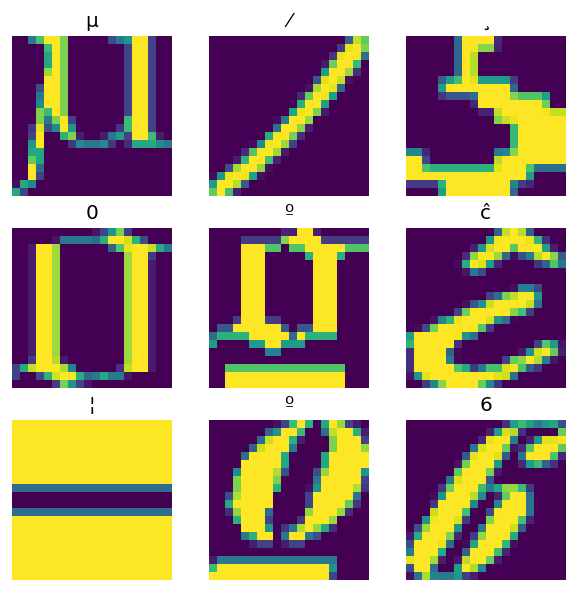

In [51]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
    plt.subplot(3,3,n+1)
    plt.imshow(features['image'][..., n])
    plt.title(chr(features['m_label'][n]))
    plt.axis('off')

In [52]:
# Lower level functions

text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [53]:
features = tf.io.decode_csv(lines, record_defaults=all_strings) 

for f in features:
    print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [54]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [55]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [56]:
features = tf.io.decode_csv(lines, record_defaults=titanic_types) 

for f in features:
    print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [57]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
    print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [58]:
def decode_titanic_line(line):
    return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    # Load the lines of text
    tf.data.TextLineDataset(titanic_file_path)
    # Skip the header row.
    .skip(1)
    # Decode the line.
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
    print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [59]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [60]:
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

In [61]:
font_csvs[0]

'fonts\\AGENCY.csv'

In [62]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs, 
    record_defaults=font_column_types, 
    header=True)

In [63]:
for row in simple_font_ds.take(10):
    print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [64]:
font_files = tf.data.Dataset.list_files("fonts/*.csv")

In [65]:
print('Epoch 1:')
for f in list(font_files)[:5]:
    print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
    print("    ", f.numpy())
print('    ...')

Epoch 1:
     b'fonts\\SNAP.csv'
     b'fonts\\GOTHICE.csv'
     b'fonts\\SEGOE.csv'
     b'fonts\\JUICE.csv'
     b'fonts\\FRENCH.csv'
    ...

Epoch 2:
     b'fonts\\GOUDY.csv'
     b'fonts\\MV_BOLI.csv'
     b'fonts\\PALACE.csv'
     b'fonts\\PAPYRUS.csv'
     b'fonts\\CONSTANTIA.csv'
    ...


In [67]:
def make_font_csv_ds(path):
    return tf.data.experimental.CsvDataset(
    path, 
    record_defaults=font_column_types, 
    header=True)

font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length=3)

fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
    fonts_dict['font_name'].append(row[0].numpy().decode())
    fonts_dict['character'].append(chr(row[2].numpy()))

pd.DataFrame(fonts_dict)

<ipython-input-67-2d579090c868>:14: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  fonts_dict['character'].append(chr(row[2].numpy()))


,font_name,character
0,COUNTRYBLUEPRINT,
1,TIMES,2
2,DUTCH801,
3,COUNTRYBLUEPRINT,
4,TIMES,7
5,DUTCH801,
6,COUNTRYBLUEPRINT,
7,TIMES,R
8,DUTCH801,
9,COUNTRYBLUEPRINT,


In [68]:
# performance

BATCH_SIZE=2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [69]:
%%time
for i,batch in enumerate(fonts_ds.take(20)):
    print('.',end='')

print()

....................
Wall time: 7.97 s


In [70]:
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1), 
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [71]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
    print('.',end='')

print()

....................
Wall time: 2.45 s
